# Credit Card Fraud Detection Dataset - Using Undersampling

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\HP PC\\Documents\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

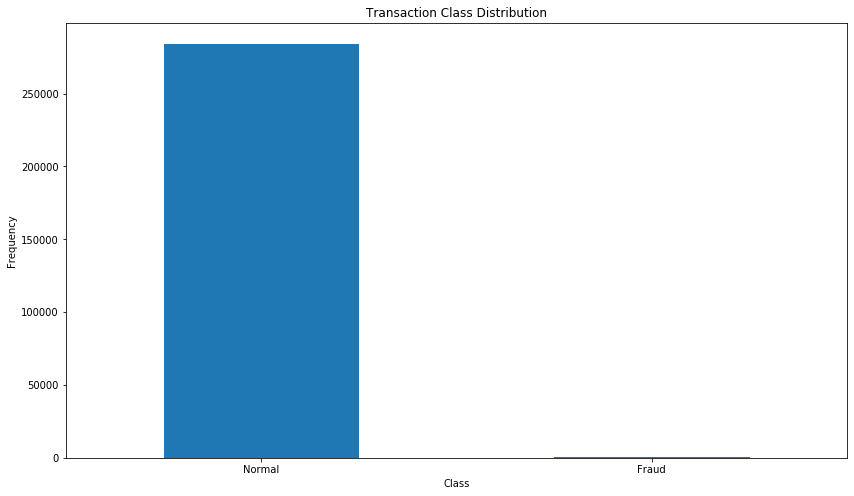

In [7]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [26]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


We can see from the shape calculation for fraud(492 transactions) and Normal(284315 transactions) that very few transactions comes under fraud category and if we perform operation on this type of data set it will not give us an accurate result.

<function matplotlib.pyplot.show(*args, **kw)>

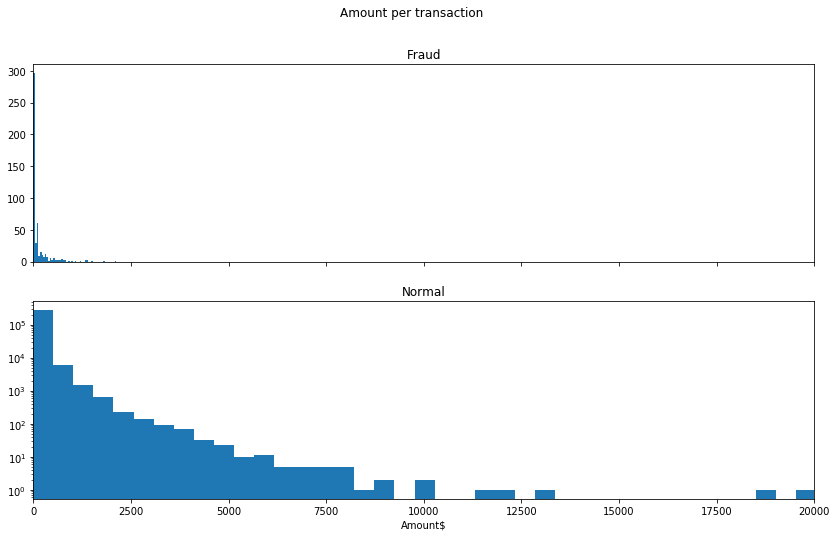

In [49]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transaction")
ax1.hist(fraud.Amount,bins=50)
ax1.set_title("Fraud")
ax2.hist(normal.Amount,bins=50)
ax2.set_title("Normal")
plt.xlabel("Amount$")
plt.xlim((0, 20000))
plt.yscale('log')
plt.show

The above plot shows the transaction amount taken for fraud Vs Normal transaction, we can see that Amoutn taken out by fraud transaction is very minimul not very high the highest fraudlent trancation remains with around 300$

# Dealing with imbalance dataset
To deal with imbalance dataset there are two techniques:
 1. Under Sampling: In this form, data is randomly selected from the normal category to match the number of fraud data with a 50:50 percent ratio
 2. Over sampling: In this form, we add more data to Fraud category, we add data in the same dimention . Suppose the ratio of normal vs fraud transaction is 9:1, so we would add 9 times same data for fraud to make it even.

In this we are going to use under sampling and apply machine learning techinques to it.

In [25]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_undr,Y_undr=nm.fit_sample(X,Y)

X_undr.shape,Y_undr.shape

((984, 30), (984,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_undr, Y_undr, test_size=0.30, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[147   3]
 [ 10 136]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       150
           1       0.98      0.93      0.95       146

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



In [39]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

from sklearn.metrics import confusion_matrix,precision_score,recall_score
confusion_matrix2 = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix2)
print(classification_report(y_test, y_pred_tree))

[[141   9]
 [  9 137]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       150
           1       0.94      0.94      0.94       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix,precision_score,recall_score
confusion_matrix3 = confusion_matrix(y_test, rf_predictions)
print(confusion_matrix3)
print(classification_report(y_test, rf_predictions))

[[149   1]
 [  9 137]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       150
           1       0.99      0.94      0.96       146

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [42]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
# make predictions for test data
y_pred_xg = model_xg.predict(X_test)

from sklearn.metrics import confusion_matrix,precision_score,recall_score
confusion_matrix4 = confusion_matrix(y_test, y_pred_xg)
print(confusion_matrix4)
print(classification_report(y_test, y_pred_xg))

[[148   2]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.99      0.95      0.97       146

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



We can see that Xgboost and Random forest yeilds arounf 97% accuracy for this dataset following Undersampling technique.